In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [5]:
df = pd.read_csv('cd_sales_concert_attendance.csv')
df.head()

Artist  cd_sales  people_attend_concert
0       1        61                   4.28
1       2        63                   4.08
2       3        67                   4.42
3       4        69                   4.17
4       5        70                   4.48

In [6]:
df.shape

(12, 3)

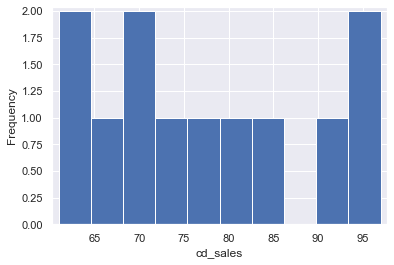

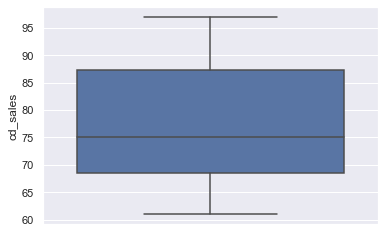

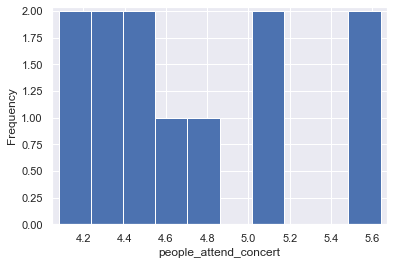

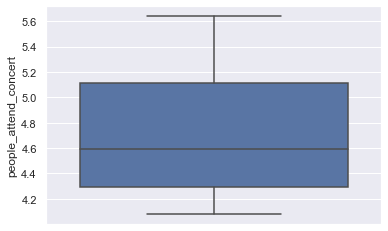

In [7]:
continuous_columns = ('cd_sales', 'people_attend_concert')

for col in continuous_columns:
    _ = plt.hist(df[col])
    _ = plt.xlabel(col)
    _ = plt.ylabel('Frequency')
    _ = plt.margins(0.02)
    plt.show()
    _ = sns.boxplot(df[col], orient='v')
    _ = plt.ylabel(col)
    plt.show()

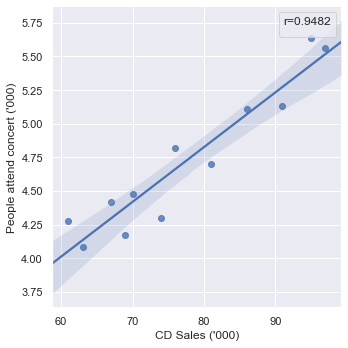

In [8]:
# plot selected corr's
plot_for_columns = ['people_attend_concert']

for col in plot_for_columns:
    _ = sns.lmplot(x='cd_sales', y=col, data=df)
    _ = plt.ylabel("People attend concert (\'000)")
    _ = plt.xlabel("CD Sales (\'000)")
    _ = plt.legend(labels=(), title='r={}'.format(round(df.cd_sales.corr(df[col]), 4)))
plt.show()

In [9]:
par = np.polyfit(df.cd_sales, df.people_attend_concert, 1)

In [10]:
slope=par[0]
intercept=par[1]
print('slope:', slope, 'intercept:', intercept)

slope: 0.04070159857904081 intercept: 1.5697927767910036


### Residual analysis

In [11]:
# y = 1.57 * 0.0407x
df['predicted_y'] = df.cd_sales.apply(lambda x: intercept + slope * x)
df.head()

Artist  cd_sales  people_attend_concert  predicted_y
0       1        61                   4.28     4.052590
1       2        63                   4.08     4.133993
2       3        67                   4.42     4.296800
3       4        69                   4.17     4.378203
4       5        70                   4.48     4.418905

In [12]:
df['residual'] = df.apply(lambda se: se.people_attend_concert - se.predicted_y, axis=1)
df.head()

Artist  cd_sales  people_attend_concert  predicted_y  residual
0       1        61                   4.28     4.052590  0.227410
1       2        63                   4.08     4.133993 -0.053993
2       3        67                   4.42     4.296800  0.123200
3       4        69                   4.17     4.378203 -0.208203
4       5        70                   4.48     4.418905  0.061095

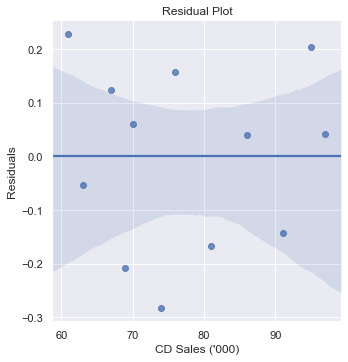

In [13]:
_ = sns.lmplot(x='cd_sales', y='residual', data=df)
_ = plt.ylabel('Residuals')
_ = plt.xlabel("CD Sales (\'000)")
_ = plt.title('Residual Plot')
plt.show()

In [14]:
x_mean = df.cd_sales.mean()
y_mean = df.people_attend_concert.mean()
num = 0

for index, row in df.iterrows():
    num += (row.people_attend_concert - y_mean) * (row.cd_sales - x_mean)
    
den = 0

for index, row in df.iterrows():
    den += (row.cd_sales - x_mean) ** 2

b1 = num / den
b1

0.04070159857904084

In [15]:
b0 = y_mean - b1 * x_mean
b0

1.5697927767910018

In [16]:
SS_res = 0
SS_tot = 0

for index, row in df.iterrows():
    SS_res += (row.people_attend_concert - (intercept + slope * row.cd_sales)) ** 2
    SS_tot += (row.people_attend_concert - y_mean) ** 2

r_2 = 1 - (SS_res / SS_tot)
r_2

0.8990838619201438

In [17]:
r_2_adjusted = 1 - (1 - r_2) * ((df.shape[0] - 1) / (df.shape[0] - 1 - 1))
r_2_adjusted

0.8889922481121582

#### The coefficient of the determinant (r_2) is the proportion of variability of the dependent variable (y) accounted for, or explained by, the independent variable (x)

In [15]:
df.cd_sales.corr(df[col]) ** 2

0.8990838619201436

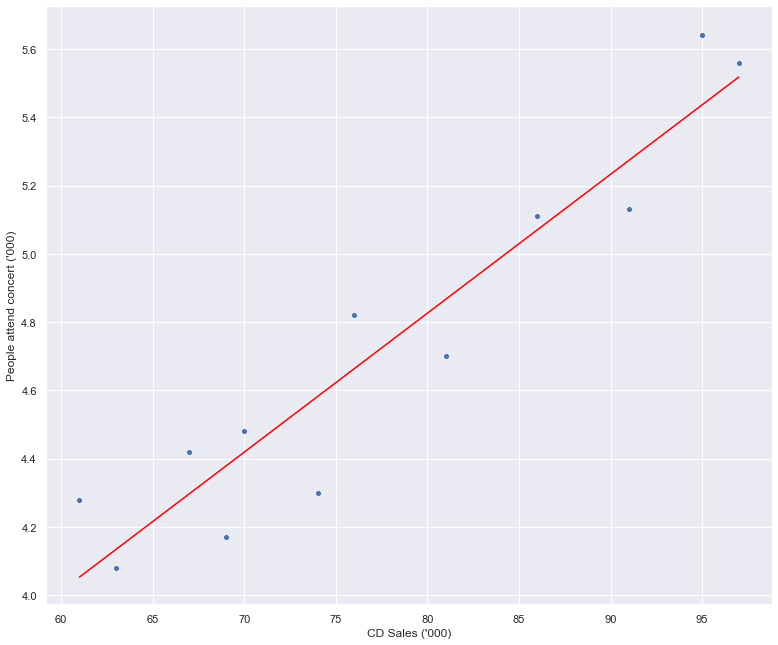

In [13]:
sns.set(rc={'figure.figsize':(13, 11)})
_ = sns.scatterplot(x='cd_sales', y='people_attend_concert', data=df)
_ = plt.plot(df.cd_sales, slope * df.cd_sales + intercept, color='red')
_ = plt.ylabel("People attend concert (\'000)")
_ = plt.xlabel("CD Sales (\'000)")
plt.show()